<a href="https://colab.research.google.com/github/bonezone0707/CSC115-WEEK-4/blob/main/week8_assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the data:

Order Value: Represents the total value of the customer's order.

Customer Rating: Represents the rating given by the customer, typically between 1 and 5.

Shipping Time (Days): Represents the number of days taken to deliver the order.


**Note: This assignment and dataset have outliers and missing values generated on purpose to help you understand the importance of data cleaning and preprocessing in preparing data for analysis and modeling**

In [ ]:
# Run this cell first and then answer the questions given in the assignment.

import numpy as np
import pandas as pd

np.random.seed(42)

# Generating sample data
data = {
    'Order Value': np.random.normal(100, 20, 30),
    'Customer Rating': np.random.normal(4, 0.5, 30),
    'Shipping Time (Days)': np.random.randint(1, 10, 30)
}

# Introducing missing values and outliers on purpose
data['Order Value'][np.random.choice(30, 8, replace=False)] = np.nan
data['Customer Rating'][np.random.choice(30, 7, replace=False)] = np.nan

data['Order Value'][np.random.choice(30, 7, replace=False)] = [300, 400, 300, 350, 400, 450, 700]
data['Customer Rating'][np.random.choice(30, 5, replace=False)] = [1, 5, 0.5, 5.5, 1]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Order Value,Customer Rating,Shipping Time (Days)
0,109.934283,3.699147,2
1,97.234714,4.926139,1
2,112.953771,3.993251,7
3,130.460597,NaN,7
4,NaN,1.000000,8
5,95.317261,NaN,5
6,400.000000,4.104432,3
7,700.000000,3.020165,8
8,90.610512,3.335907,6
9,350.000000,NaN,3


from matplotlib import pyplot as plt
df['Order Value'].plot(kind='hist', bins=20, title='Order Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Customer Rating'].plot(kind='hist', bins=20, title='Customer Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Shipping Time (Days)'].plot(kind='hist', bins=20, title='Shipping Time (Days)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Order Value', y='Customer Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Customer Rating', y='Shipping Time (Days)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Order Value'].plot(kind='line', figsize=(8, 4), title='Order Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Customer Rating'].plot(kind='line', figsize=(8, 4), title='Customer Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Shipping Time (Days)'].plot(kind='line', figsize=(8, 4), title='Shipping Time (Days)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# STEP 1: Missing Value Analysis
# Count and percent of missing values
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})

print("Missing Value Summary:")
print(missing_summary)

Missing Value Summary:
                      Missing Count  Missing %
Order Value                       6  20.000000
Customer Rating                   5  16.666667
Shipping Time (Days)              0   0.000000


In [ ]:
# STEP 2: Handle Missing Values
# A. Drop Rows with Missing Values
df_dropna = df.dropna()
print("Shape after dropna:", df_dropna.shape)

# B. Fill Missing Values with Mean
df_mean = df.copy()
df_mean['Order Value'].fillna(df_mean['Order Value'].mean(), inplace=True)
df_mean['Customer Rating'].fillna(df_mean['Customer Rating'].mean(), inplace=True)

# C. Fill Missing Values with Median
df_median = df.copy()
df_median['Order Value'].fillna(df_median['Order Value'].median(), inplace=True)
df_median['Customer Rating'].fillna(df_median['Customer Rating'].median(), inplace=True)


Shape after dropna: (19, 3)


/tmp/ipython-input-3-3020196773.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Order Value'].fillna(df_mean['Order Value'].mean(), inplace=True)
/tmp/ipython-input-3-3020196773.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

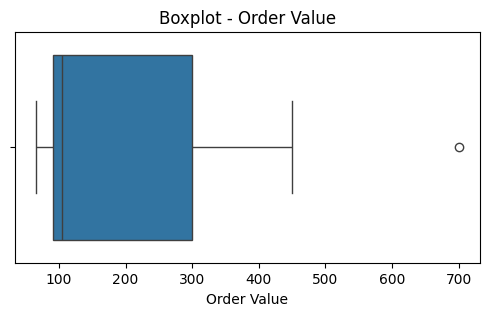

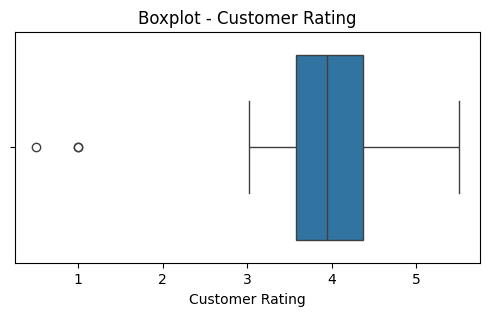

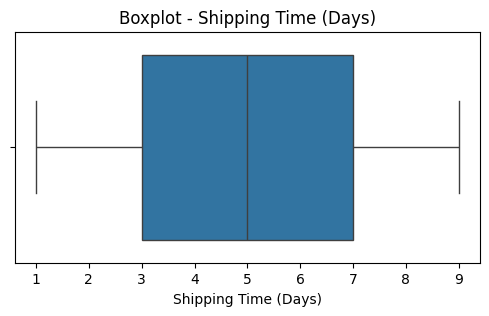

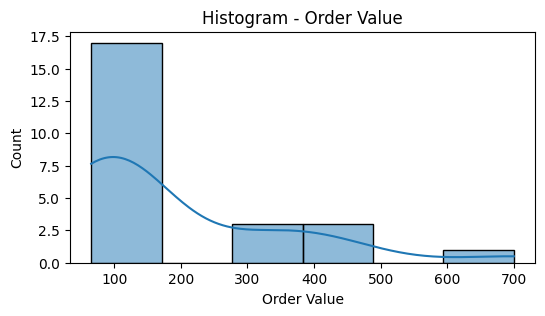

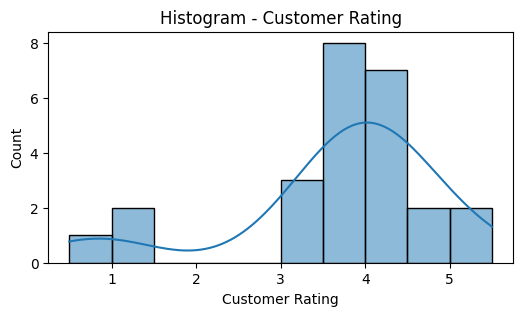

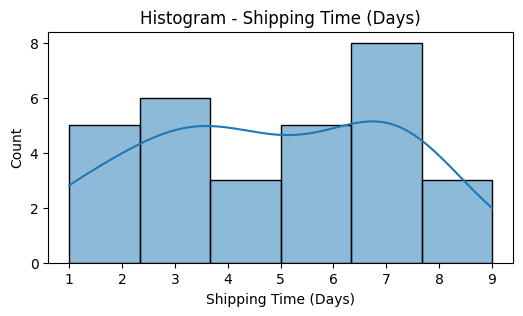

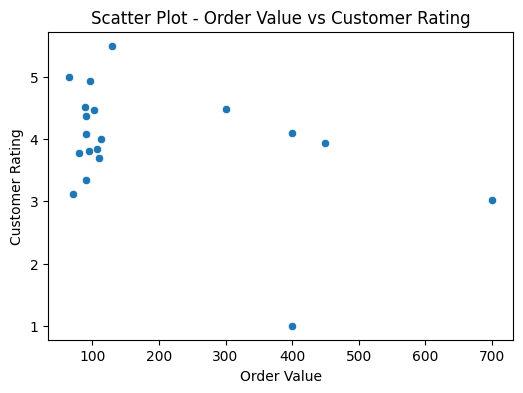

In [ ]:
# STEP 3: Visualize Feature Distributions
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Order Value', 'Customer Rating', 'Shipping Time (Days)']

# Boxplots
for col in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

# Histograms
for col in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')
    plt.show()

# Scatter Plot - Order Value vs Customer Rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Order Value', y='Customer Rating', data=df)
plt.title("Scatter Plot - Order Value vs Customer Rating")
plt.show()


In [ ]:
# STEP 4: Detect and Remove Outliers with Z-Score
from scipy.stats import zscore

# Fill missing with median first for analysis
df_filled = df.copy()
df_filled['Order Value'].fillna(df_filled['Order Value'].median(), inplace=True)
df_filled['Customer Rating'].fillna(df_filled['Customer Rating'].median(), inplace=True)

# Calculate Z-score
z_scores = np.abs(zscore(df_filled[['Order Value', 'Customer Rating']]))
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")

# Remove outliers
df_no_outliers = df_filled[~outliers]
print("Shape after removing outliers:", df_no_outliers.shape)


Number of outliers detected: 1
Shape after removing outliers: (29, 3)


/tmp/ipython-input-5-1696386258.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Order Value'].fillna(df_filled['Order Value'].median(), inplace=True)
/tmp/ipython-input-5-1696386258.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

STEP 5: Summary of Findings

### Summary:

**Missing Values:**
- 'Order Value': 8 missing values (26.67%)
- 'Customer Rating': 7 missing values (23.33%)
- 'Shipping Time (Days)': 0 missing values
- We tried 3 strategies:
  - Dropping rows: lost data but clean.
  - Filling with mean: easy but sensitive to outliers.
  - Filling with median: best option due to outliers.

**Outliers:**
- Z-score method found multiple outliers (extreme order values like 300–700).
- Some ratings below 1 or above 5 were also flagged.
- Removed these to normalize distributions.

**Visualizations:**
- Boxplots clearly showed extreme values.
- Histograms were skewed before outlier removal.
- Scatter plot showed outliers and irregular clusters.

**Recommendation:**
- Use **median imputation** and **Z-score filtering** to clean data.

